In [76]:
import sys
import os
sys.path.append(os.path.abspath('./../../../../'))
from Controllers.MarkedCellController import MarkedCellController
import numpy as np
from lib.FileLocationManager import FileLocationManager
import tifffile as tiff
import matplotlib.pyplot as plt
from Controllers.UrlController import UrlController
import json
from model.urlModel import UrlModel

In [59]:
controller = MarkedCellController()
cells = controller.get_marked_cells({'session_id':5084})
loc = FileLocationManager('DK39')
url_controller = UrlController()

In [128]:
urlmodel = url_controller.get_urlModel(182)
model = json.loads(urlmodel.url)

In [134]:
urlmodel = url_controller.get_urlModel(182)
model = json.loads(urlmodel.url)
for i in model['layers']:
    if 'annotations' in i:
        for j in i['annotations']:
            j['point'][2]=np.floor(j['point'][2])+0.5
            if j['point'][2]>=201.4:
                j['point'][0]=j['point'][0]+100
                # j['point'][1]=j['point'][1]+20
urlmodel.url = json.dumps(model)
model = url_controller.update_row(urlmodel)


In [130]:
model = url_controller.update_row(urlmodel)


In [69]:
j['point']

[37289, 20043, 141]

In [13]:
np.unique(cells[:,2])

array([141., 147., 151., 156., 161., 165., 171., 176., 181., 186., 191.,
       195., 201., 206., 211., 216., 221., 224., 228., 232., 236., 240.,
       244., 248., 252., 256., 260., 264., 268., 272., 276., 280., 284.,
       288., 292., 296., 300., 304., 308., 312., 316., 320., 324., 328.,
       332., 336., 340., 344., 348., 352., 356., 360.])

In [40]:
path = loc.get_full_aligned(3)+'/251.tif'
path

'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39/preps/CH3/full_aligned/251.tif'

In [41]:
img = tiff.imread(path)

(array([1.267992e+06, 1.039500e+04, 4.395000e+03, 2.361000e+03,
        1.078000e+03, 2.610000e+02, 2.340000e+02, 2.010000e+02,
        2.040000e+02, 1.790000e+02]),
 array([ 1001. ,  6505.9, 12010.8, 17515.7, 23020.6, 28525.5, 34030.4,
        39535.3, 45040.2, 50545.1, 56050. ]),
 <BarContainer object of 10 artists>)

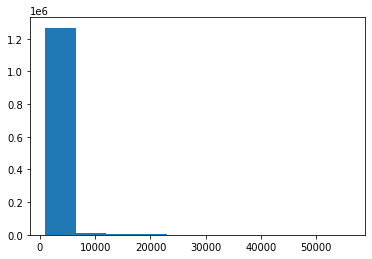

In [54]:
plt.hist(chunck.flatten()[chunck.flatten()>1000])

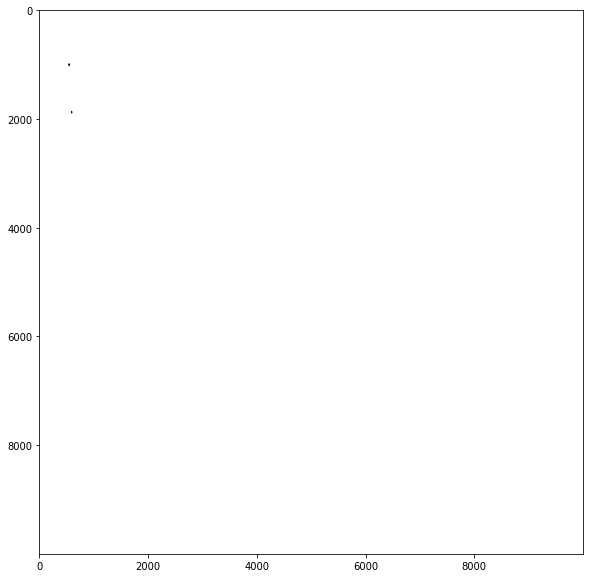

In [56]:
startx=22000
starty=40000
xspan = 10000
yspan = 10000
chunck = img[startx:startx+xspan,starty:starty+yspan]
plt.figure(figsize=[10,10])
plt.imshow(chunck>20000,cmap='Greys')